
### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

# 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
feature_name_df1 = pd.read_csv('C:/Users/Playdata/Downloads/human_activity/features.txt',sep='\s+',
                        header=None, names=['column_index','column_name'])

# 중복된 피처 제거 후 리스트 변환
feature_name_df = feature_name_df1.column_name.unique().tolist()

In [4]:
# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('C:/Users/Playdata/Downloads/human_activity/train/X_train.txt',sep='\s+', names=feature_name_df )
X_test = pd.read_csv('C:/Users/Playdata/Downloads/human_activity/test/X_test.txt',sep='\s+', names=feature_name_df)
    
# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('C:/Users/Playdata/Downloads/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('C:/Users/Playdata/Downloads/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

In [5]:
# 결정트리, Random Forest 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 결정트리, RandomForestClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

RandomForestClassifier 정확도:0.8561


In [6]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
#디시션트리 / 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.8min finished


GridSearchCV 최고 평균 정확도 수치:0.8562
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8}


In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[200],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 200}
최고 예측 정확도: 0.9027


In [11]:
best_dt_clf = grid_cv.best_estimator_

pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8571


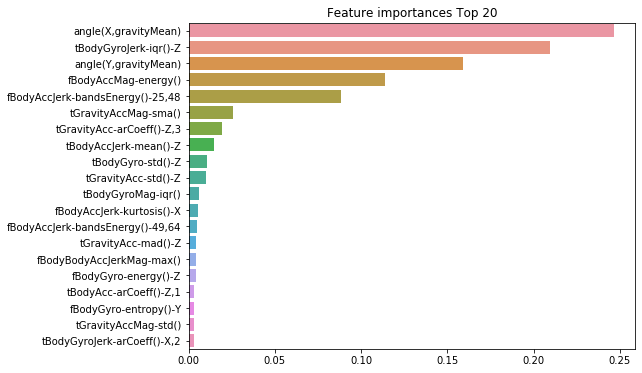

In [28]:
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))
# loss - 함수지정해서 디폴트값으로 대변수값을 씀.
# learnig-rate - 학습을 진행할때마다 학습기를 사용하면서 0~1 사이 지정.
# n_estimators - 
# subsample -
# tima< learing 으로 했을때가 최고지만 시간이 오래걸린다.

NameError: name 'get_human_dataset' is not defined